# Exploratory Data Analysis on Animal Shelter Dataset
---

### Please read README file before to understand the dataset!
---

In [3]:
# importing necessary libraries 
import pandas as pd 
import numpy as np

# loading in the datasets
intakes_df = pd.read_csv('Austin_Animal_Center_Intakes.csv', index_col= 'Animal ID')
outcomes_df = pd.read_csv('Austin_Animal_Center_Outcomes.csv', index_col= 'Animal ID')





### Lets learn a little bit about our first dataset (intakes)
---

In [4]:
intakes_df.head() # making sure dataset was loaded in correctly


,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
Animal ID,,,,,,,,,,,
A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [9]:
intakes_df.shape # viewing how many rows and columns we have in our df

(124120, 11)

In [11]:
intakes_df.info() # looking at the datatypes and non-null counts of each column

<class 'pandas.core.frame.DataFrame'>
Index: 124120 entries, A786884 to A830181
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Name              85069 non-null   object
 1   DateTime          124120 non-null  object
 2   MonthYear         124120 non-null  object
 3   Found Location    124120 non-null  object
 4   Intake Type       124120 non-null  object
 5   Intake Condition  124120 non-null  object
 6   Animal Type       124120 non-null  object
 7   Sex upon Intake   124119 non-null  object
 8   Age upon Intake   124120 non-null  object
 9   Breed             124120 non-null  object
 10  Color             124120 non-null  object
dtypes: object(11)
memory usage: 11.4+ MB


In [18]:
intakes_df.isnull().sum() # a nicer way to look at null values

Name                39051
DateTime                0
MonthYear               0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake         1
Age upon Intake         0
Breed                   0
Color                   0
dtype: int64

### Step 1: Cleaning up the data
---

In [32]:
# checking if any duplicate rows that we can delete 
intakes_df.duplicated(keep=False).sum()

6424

In [34]:
intakes_df.drop_duplicates(inplace=True) # dropping duplicate rows

In [25]:
# Exploring the single null value in Sex upon Intake column
filt = intakes_df['Sex upon Intake'].isnull() == True

# Doesn't seem like we will need such column in our analysis so we can leave it
intakes_df.loc[filt]

,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
Animal ID,,,,,,,,,,,
A667395,Diego,11/17/2013 01:15:00 PM,11/17/2013 01:15:00 PM,Pflugerville (TX),Owner Surrender,Normal,Dog,NaN,7 years,Dachshund,Brown Merle


In [39]:
# Datetime and MonthYear column look exactly the same so lets explore this more
intakes_df[['DateTime', 'MonthYear']].head(20)

,DateTime,MonthYear
Animal ID,,
A786884,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM
A706918,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM
A724273,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM
A665644,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM
A682524,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM
A743852,02/18/2017 12:46:00 PM,02/18/2017 12:46:00 PM
A635072,04/16/2019 09:53:00 AM,04/16/2019 09:53:00 AM
A708452,07/30/2015 02:37:00 PM,07/30/2015 02:37:00 PM
A818975,06/18/2020 02:53:00 PM,06/18/2020 02:53:00 PM


In [ ]:
# drop MonthYear Column
intakes_df.drop(columns='MonthYear', inplace=True)



In [47]:
# we saw earlier that datetime column is an object
# lets convert to datetime datatype so we can work with it more efficiently 
intakes_df['DateTime'] = pd.to_datetime(intakes_df['DateTime'], format = '%m/%d/%Y %I:%M:%S %p')

In [49]:
intakes_df['DateTime'] # can see dtype has changed 

Animal ID
A786884   2019-01-03 16:19:00
A706918   2015-07-05 12:59:00
A724273   2016-04-14 18:43:00
A665644   2013-10-21 07:59:00
A682524   2014-06-29 10:38:00
                  ...        
A828158   2021-01-08 19:01:00
A830183   2021-03-03 17:12:00
A830180   2021-03-03 16:31:00
A830171   2021-03-03 17:13:00
A830181   2021-03-03 16:31:00
Name: DateTime, Length: 120296, dtype: datetime64[ns]

In [51]:
# lets rename the column to something more clear
intakes_df.rename(columns={'DateTime': 'Date of Intake'}, inplace=True)

In [58]:
# lets deal will null values in name column
intakes_df['Name'] = intakes_df['Name'].fillna('Unknown')


### Now that our df is cleaned up we can start extracting some useful information

#### Q1: What are the conditions animals are taken into the shelter? What method of intake is the most common?

In [60]:
# counts of each unique condition
intakes_df['Intake Condition'].value_counts()

Intake Condition
Normal      104910
Injured       6593
Sick          4968
Nursing       2910
Aged           430
Other          223
Feral          102
Pregnant        77
Medical         63
Behavior        20
Name: count, dtype: int64

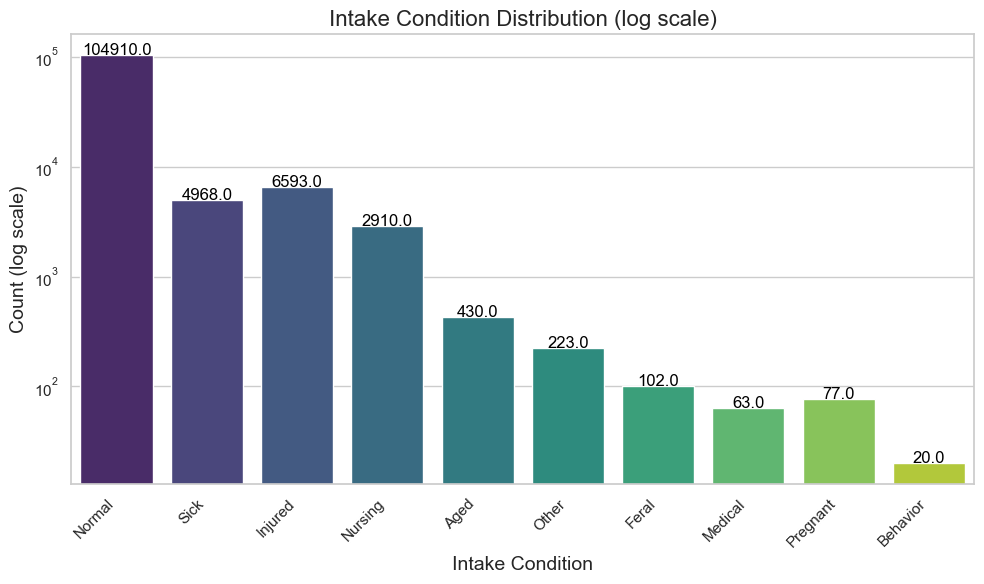

In [225]:
# lets showcase this in a more visually appealing way. I used a log scale because we have a very wide range of values on y axis and wanted to be able to display all of them
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Intake Condition', data=intakes_df, hue='Intake Condition', palette='viridis', dodge=False)

plt.yscale('log')

plt.xlabel('Intake Condition', fontsize=14)
plt.ylabel('Count (log scale)', fontsize=14)
plt.title('Intake Condition Distribution (log scale)', fontsize=16)

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black')

plt.tight_layout()
plt.show()







In [226]:
# most common intake methods 
intakes_df['Intake Type'].value_counts()

Intake Type
Stray                 83567
Owner Surrender       24168
Public Assist          7481
Wildlife               4557
Abandoned               266
Euthanasia Request      257
Name: count, dtype: int64

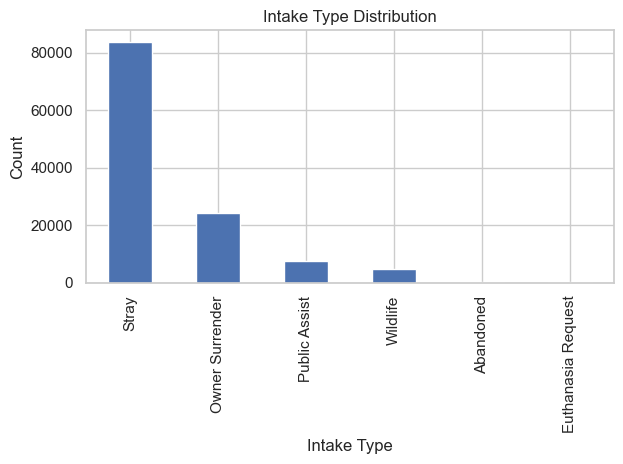

In [227]:
# example of what normal bar graph would look like with wide range of y values. Think log scale is more visually appealing.

intakes_df['Intake Type'].value_counts().plot.bar()
plt.xlabel('Intake Type')
plt.ylabel('Count')
plt.title('Intake Type Distribution')
plt.tight_layout()
plt.show()


####  Q2: What are the intake conditions for each intake type?

In [196]:
# grouping by intake type and then counting all the values for intake condition
intakes_df.groupby('Intake Type')['Intake Condition'].value_counts()

Intake Type         Intake Condition
Abandoned           Normal                225
                    Nursing                23
                    Sick                   11
                    Medical                 4
                    Injured                 3
Euthanasia Request  Sick                  105
                    Normal                 87
                    Aged                   43
                    Injured                20
                    Other                   2
Owner Surrender     Normal              22474
                    Sick                  817
                    Injured               462
                    Nursing               231
                    Aged                   94
                    Other                  41
                    Medical                16
                    Pregnant               14
                    Behavior               10
                    Feral                   9
Public Assist       Normal               69

#### Q3: What are the 10 most common animal names?

In [195]:
# shows us 10 most common, but we want to drop unknown
intakes_df['Name'].value_counts().head(10)

Name
Unknown     35279
Max           564
Bella         523
Luna          494
Rocky         383
Daisy         365
Princess      331
Charlie       325
Coco          324
Buddy         320
Lucy          312
Blue          304
Lola          270
Zeus          227
Oreo          205
Cookie        204
Shadow        204
Jack          203
Sadie         202
Bear          202
Name: count, dtype: int64

In [197]:
# dropping unknown values
name_counts = intakes_df['Name'].value_counts().drop('Unknown')

In [198]:
top_10_names = name_counts.head(10)

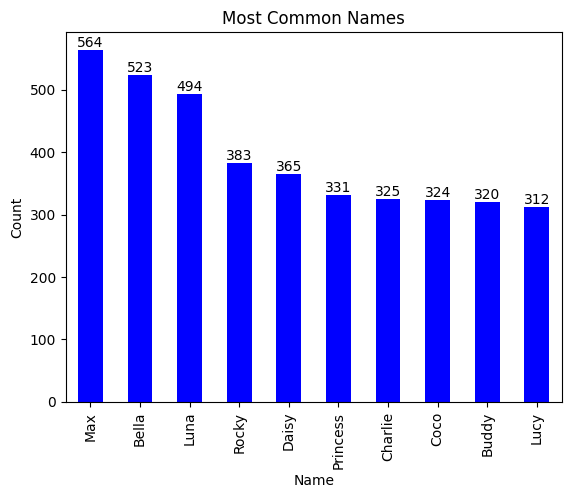

In [209]:
# plotting 10 most common names

graph = top_10_names.plot(kind='bar', color='blue')

for i, v in enumerate(top_10_names):
    graph.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Most Common Names')
plt.show()

#### Q4: What is the most common month for intakes?

In [78]:
# since we converted column into datetime object we can use some easy methods to answer this question now
intakes_df['Date of Intake'].dt.month.value_counts()

Date of Intake
5     11844
6     11559
10    11530
7     10615
9     10493
8     10202
11     9793
3      9106
4      9006
12     8949
1      8912
2      8287
Name: count, dtype: int64

Text(0, 0.5, 'Amount of Intake')

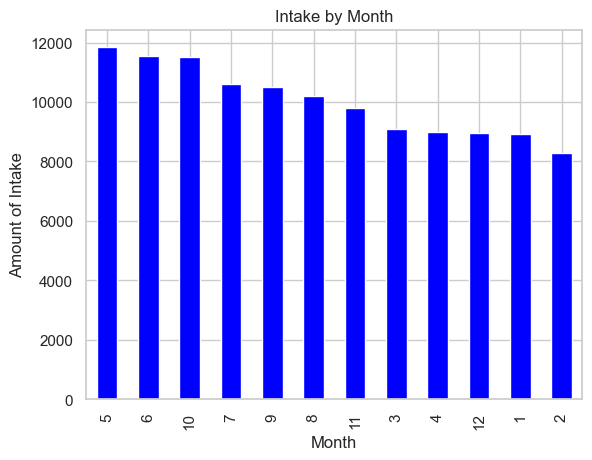

In [242]:
chart = intakes_df['Date of Intake'].dt.month.value_counts().plot.bar(x = 'Month', y='Amount of Intake', color='Blue') # seems like May and June are most popular months for intake
chart.set_title('Intake by Month')
chart.set_xlabel('Month')
chart.set_ylabel('Amount of Intake')

#### Lets answer a more complex question. 
#### Q4: What was the duration of stay in the shelter for each animal?
---
##### For this we need our outcomes dataset, so let's clean it up real quick before we answer the question.

In [88]:
outcomes_df.duplicated(keep=False).sum()

3684

In [91]:
outcomes_df.drop_duplicates(inplace=True)

In [94]:
outcomes_df['DateTime'] = pd.to_datetime(outcomes_df['DateTime'], format = '%m/%d/%Y %I:%M:%S %p')

In [104]:
outcomes_df.rename(columns = {'DateTime':'Date of Outcome'}, inplace=True)

In [107]:
outcomes_df.drop(columns='MonthYear', inplace=True)

In [111]:
# in order to answer question we need to join both dfs
intakes_outcomes_df = intakes_df.join(outcomes_df, how='inner', lsuffix='_intakes', rsuffix='_outcomes')


In [133]:
intakes_outcomes_df.head(1)

,Name_intakes,Date of Intake,Found Location,Intake Type,Intake Condition,Animal Type_intakes,Sex upon Intake,Age upon Intake,Breed_intakes,Color_intakes,Name_outcomes,Date of Outcome,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_outcomes,Sex upon Outcome,Age upon Outcome,Breed_outcomes,Color_outcomes
Animal ID,,,,,,,,,,,,,,,,,,,,
A006100,Scamp,2014-12-19 10:21:00,8700 Research Blvd in Austin (TX),Public Assist,Normal,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White,Scamp,2014-12-20 16:35:00,07/09/2007,Return to Owner,NaN,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White


In [114]:
# my joined df has more rows than both dfs used to join, this means that we have duplicate indexes
# in the context of our dataset this means that some animals had multiple stays at the shelter which is relevant to our analysis so we can proceed
intakes_outcomes_df.shape

(155768, 20)

In [137]:
# lets add a new column, duration of stay
# we can calculate duration of stay by subtracting the date of intake from date of outcome

intakes_outcomes_df['Duration of Stay'] = (intakes_outcomes_df['Date of Outcome'] - intakes_outcomes_df['Date of Intake'])

In [140]:
# if you look at our new column you notice we have some (-) values for days, these don't make sense and we should delete them
intakes_outcomes_df.head(20)

,Name_intakes,Date of Intake,Found Location,Intake Type,Intake Condition,Animal Type_intakes,Sex upon Intake,Age upon Intake,Breed_intakes,Color_intakes,...,Date of Outcome,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_outcomes,Sex upon Outcome,Age upon Outcome,Breed_outcomes,Color_outcomes,Duration of Stay
Animal ID,,,,,,,,,,,,,,,,,,,,,
A006100,Scamp,2014-12-19 10:21:00,8700 Research Blvd in Austin (TX),Public Assist,Normal,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White,...,2014-12-20 16:35:00,07/09/2007,Return to Owner,NaN,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White,1 days 06:14:00
A006100,Scamp,2014-12-19 10:21:00,8700 Research Blvd in Austin (TX),Public Assist,Normal,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White,...,2017-12-07 00:00:00,07/09/2007,Return to Owner,NaN,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White,1083 days 13:39:00
A006100,Scamp,2014-12-19 10:21:00,8700 Research Blvd in Austin (TX),Public Assist,Normal,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White,...,2014-03-08 17:10:00,07/09/2007,Return to Owner,NaN,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White,-286 days +06:49:00
A006100,Scamp,2017-12-07 14:07:00,Colony Creek And Hunters Trace in Austin (TX),Stray,Normal,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White,...,2014-12-20 16:35:00,07/09/2007,Return to Owner,NaN,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White,-1083 days +02:28:00
A006100,Scamp,2017-12-07 14:07:00,Colony Creek And Hunters Trace in Austin (TX),Stray,Normal,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White,...,2017-12-07 00:00:00,07/09/2007,Return to Owner,NaN,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White,-1 days +09:53:00
A006100,Scamp,2017-12-07 14:07:00,Colony Creek And Hunters Trace in Austin (TX),Stray,Normal,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White,...,2014-03-08 17:10:00,07/09/2007,Return to Owner,NaN,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White,-1370 days +03:03:00
A006100,Scamp,2014-03-07 14:26:00,8700 Research in Austin (TX),Public Assist,Normal,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White,...,2014-12-20 16:35:00,07/09/2007,Return to Owner,NaN,Dog,Neutered Male,7 years,Spinone Italiano Mix,Yellow/White,288 days 02:09:00
A006100,Scamp,2014-03-07 14:26:00,8700 Research in Austin (TX),Public Assist,Normal,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White,...,2017-12-07 00:00:00,07/09/2007,Return to Owner,NaN,Dog,Neutered Male,10 years,Spinone Italiano Mix,Yellow/White,1370 days 09:34:00
A006100,Scamp,2014-03-07 14:26:00,8700 Research in Austin (TX),Public Assist,Normal,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White,...,2014-03-08 17:10:00,07/09/2007,Return to Owner,NaN,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White,1 days 02:44:00


In [147]:
# lets define a funtion that can deal with this 

def has_negative(value):
    if '-' not in str(value):
        return value
    else:
        return None

In [152]:
intakes_outcomes_df['Duration of Stay'] = intakes_outcomes_df['Duration of Stay'].apply(has_negative)

In [157]:
intakes_outcomes_df['Duration of Stay'] # funtion worked as intended

Animal ID
A006100      1 days 06:14:00
A006100   1083 days 13:39:00
A006100                  NaT
A006100                  NaT
A006100                  NaT
                 ...        
A830112      0 days 00:49:00
A830114      0 days 00:17:00
A830138      0 days 01:03:00
A830156      0 days 01:18:00
A830164      0 days 00:11:00
Name: Duration of Stay, Length: 155768, dtype: timedelta64[ns]

In [166]:
# we now have a column that shows us the duration of day for each animal id
intakes_outcomes_df['Duration of Stay'].head(20)

Animal ID
A006100      1 days 06:14:00
A006100   1083 days 13:39:00
A006100                  NaT
A006100                  NaT
A006100                  NaT
A006100                  NaT
A006100    288 days 02:09:00
A006100   1370 days 09:34:00
A006100      1 days 02:44:00
A047759      4 days 23:17:00
A134067      0 days 02:52:00
A141142      0 days 20:54:00
A163459      0 days 04:17:00
A165752      0 days 05:07:00
A169438      0 days 00:10:00
A178569      6 days 06:12:00
A189592      0 days 01:18:00
A191351      3 days 21:32:00
A197810     14 days 02:53:00
A200922     49 days 17:57:00
Name: Duration of Stay, dtype: timedelta64[ns]

In [167]:
# we can see dive deeper and see some interesting statistics about the duration of stay, such as the median stay being 6 days
# this perhaps indicates that a lot of animals are returned back to owners, lets explore this
intakes_outcomes_df['Duration of Stay'].describe()

count                         136803
mean      60 days 19:54:22.856516306
std      186 days 15:02:48.081640910
min                  0 days 00:00:00
25%                  2 days 07:07:00
50%                  6 days 23:53:00
75%                 32 days 23:12:00
max               2553 days 05:31:00
Name: Duration of Stay, dtype: object

In [170]:
# we can see a count of each outcome type but lets group then and get the duration of stay associated with each type
intakes_outcomes_df['Outcome Type'].value_counts()

Outcome Type
Adoption           71664
Transfer           36826
Return to Owner    35927
Euthanasia          8296
Rto-Adopt           1325
Died                1091
Disposal             499
Missing               92
Relocate              21
Name: count, dtype: int64

In [171]:
# grouping the df by outcome type, so we can explore the median times associated with the three most common outcome types
outcome_type_group = intakes_outcomes_df.groupby('Outcome Type')

In [186]:
# median time it takes for animal to be returned to owner
outcome_type_group['Duration of Stay'].median().loc['Return to Owner']
                                                                                

Timedelta('1 days 05:56:00')

In [187]:
# median time it takes for animal to be adopted
outcome_type_group['Duration of Stay'].median().loc['Adoption']

Timedelta('10 days 08:21:00')

In [188]:
# median time it takes for animal to be transfered

outcome_type_group['Duration of Stay'].median().loc['Transfer']

Timedelta('4 days 06:19:00')

#### As always there is a lot more we could explore, but I just wanted to answer a couple questions about this dataset to showcase some skills. I hope you enjoyed my exploratory analysis of this particular animal shelter. Thanks :)